## Purpose

In this notebook, we will use the WAXS_class code to perform the following operations:

- extract PDF from scattering data in ascii format
- perform a structure screening from structure files stored in a given directory, through fast refinement
- perform a final refinement with the best structure candidate.

In [1]:
%matplotlib widget
from PDF_BatchAnalysis import PDFExtractor,StructureScreener,StructureGenerator,PDFRefinement,StructureCustom
import numpy as np
import glob
import os



## PDF extraction from scattering data

Define the following entities
- working directory
- Experimental ascii files with scattering data


In [2]:
path='/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/'
emptyfile=path+'empty_cap_500um-RRI_vct15h_1.ASC'
# Create list of sample ascii files, all starting with 'OSR'
datafilelist=glob.glob(os.path.join(path,'OSR*.ASC'))
for file in datafilelist:
    print(file)

/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/OSR28.ASC
/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/OSR38.ASC
/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/OSR24-02.ASC
/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/OSR10.ASC
/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/OSR62.ASC
/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/OSR55-02.ASC


PDF file(s) extracted in /home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/extracted_PDF


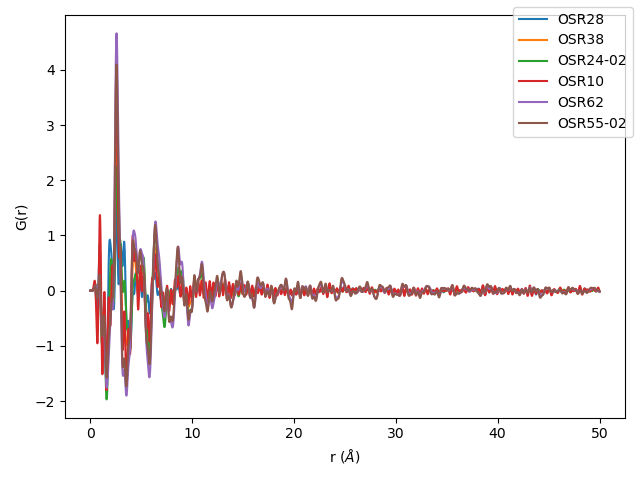

In [3]:
extractor=PDFExtractor(datafilelist=datafilelist,
                       composition='Fe',
                       qmin=0.5,
                       qmax=16.6,
                       qmaxinst=16.6,
                       rpoly=0.9,
                       dataformat='twotheta',
                       emptyfile=emptyfile)
pdfpath=extractor.extractpdf()



## Structure Generation

For this test we will generate spheres of various sizes, using $Fe-\beta$ structure. Diameter of sphere will vary between 1.5 and 2.5nm.

In [4]:
cif_file='/home-local/ratel-ra/Documents/CIF_database/Fe_beta.cif'
generator=StructureGenerator(pdfpath,cif_file=cif_file,size_array=np.linspace(18,23,6),sphere_only=True)
strufile_dir=generator.run()

Crystal structure loaded from cif:
Cell edges: a=6.345000, b=6.345000, c=6.345000
Cell angles: $\alpha$=90.00,$\beta$=90.00, $\gamma$=90.00 
Bravais unit cell:cubic
Atomic Positions:
Atom Fe: (0, array([0.061, 0.061, 0.061]))
Atom Fe: (1, array([0.189, 0.811, 0.311]))
Atom Fe: (2, array([0.439, 0.939, 0.561]))
Atom Fe: (3, array([0.311, 0.189, 0.811]))
Atom Fe: (4, array([0.561, 0.439, 0.939]))
Atom Fe: (5, array([0.811, 0.311, 0.189]))
Atom Fe: (6, array([0.939, 0.561, 0.439]))
Atom Fe: (7, array([0.689, 0.689, 0.689]))
Atom Fe: (8, array([0.125, 0.206, 0.456]))
Atom Fe: (9, array([0.044, 0.875, 0.706]))
Atom Fe: (10, array([0.375, 0.794, 0.956]))
Atom Fe: (11, array([0.456, 0.125, 0.206]))
Atom Fe: (12, array([0.625, 0.294, 0.544]))
Atom Fe: (13, array([0.956, 0.375, 0.794]))
Atom Fe: (14, array([0.875, 0.706, 0.044]))
Atom Fe: (15, array([0.544, 0.625, 0.294]))
Atom Fe: (16, array([0.206, 0.456, 0.125]))
Atom Fe: (17, array([0.706, 0.044, 0.875]))
Atom Fe: (18, array([0.794, 0.956, 

## Customize structure

It is possible to modify interatomic distances (homothethic transformation) or apply random atomic substitution
The class StructureCustom was dsigned in that purpose. It is initialized with the following arguments:
- strufile: path to the structure file to modify
- zoomscale: coefficient by which x y z coordinates are multiplied (may be useful to produce a final structural model after refinement)

Random atomic substitution is performed providing the  additional arguments:
- new_element: atom name to be inserted
- fraction: corresponding fraction af the atom to be inserted


In [5]:
from PDF_BatchAnalysis import StructureCustom

file=strufile_dir+'/Sphere_phi=22_Fe_beta.xyz'
transformer=StructureCustom(file,zoomscale=0.9)
newfile=transformer.transform_structure()

os.system(f'jmol {newfile}')

l.379 Fe
splash_image=jar:file:/usr/share/java/Jmol-14.6.4+2016.11.05.jar!/org/openscience/jmol/app/images/Jmol_splash.jpg
history file is /home-local/ratel-ra/.jmol/history
user properties file is /home-local/ratel-ra/.jmol/properties
(C) 2015 Jmol Development
Jmol Version: 14.6.4_2016.11.05  2016-11-10 03:30
java.vendor: Java: Ubuntu
java.version: Java 11.0.26
os.name: Linux
Access: ALL
memory: 23.3/524.3
processors available: 16
useCommandThread: false
User macros dir: /home-local/ratel-ra/.jmol/macros
       exists: false
  isDirectory: false
Executing script: load "/home-local/ratel-ra/Documents/PDF_data/Oscar/test_batch/extracted_PDF/structure_files_Fe_beta/Sphere_phi=22_Fe_beta_zoomscale=0.90_Fe70Mn30.xyz";


0

## Structure screening

We now perform quick refinements to find the best structure candidate

In [ ]:
#strufile_dir='/home-local/ratel-ra/Documents/PDF_data/Oscar/test/structures_pyNMB/'

# Define conditions for fast refinement
rbins=3
#refinement_tags={'scale_factor':True,'zoomscale':True,'delta2':True,'Uiso':False}
screener=StructureScreener(strufile_dir,pdfpath,save_tag=True,rbins=rbins)
best_results=screener.run()
# best_results=dict{pdffile:best_structure}

In [ ]:
for key,value in best_results.items():
    print(key, value)

### Perform final refinement

Perform final refinement with rbins=1 (default value of PDFRefinement class)

In [ ]:

for pdffile in list(best_results.keys()):

    strufile=best_results[pdffile]
    refinement=PDFRefinement(pdffile,strufile,save_tag=True)
    refinement.refine()